In [1]:
import sys
import os

# Model path where RAUNet.py is located
model_path = '/kaggle/input/raunet-model/pytorch/default/1'  # Ensure RAUNet.py is placed here
if model_path not in sys.path:
    sys.path.append(model_path)

# Attempt to import RAUNet
try:
    import RAUNet
    print("RAUNet model successfully imported!")
except ImportError as e:
    print(f"Error importing RAUNet: {e}")
    raise

# Initialize the RAUNet model
try:
    model = RAUNet.RAUNet(num_classes=1, num_channels=3, pretrained=True)
    print("Model initialized successfully!")
    print(model)
except AttributeError as e:
    print(f"Error initializing RAUNet: {e}")


RAUNet model successfully imported!


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model initialized successfully!
RAUNet(
  (firstconv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (firstbn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (firstrelu): ReLU(inplace=True)
  (firstmaxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:


# import os
# import cv2
# import albumentations as A

# def augment_images_and_masks(image_dir, mask_dir, output_image_dir, output_mask_dir, num_augmentations=4):
#     """
#     Augments images and their corresponding masks with the same transformations.
#     Normalization is applied only to the image, not the mask.

#     Args:
#         image_dir: Path to the directory containing the images.
#         mask_dir: Path to the directory containing the masks.
#         output_image_dir: Path to the directory to save augmented images.
#         output_mask_dir: Path to the directory to save augmented masks.
#         num_augmentations: Number of augmentations to create per image.
#     """

#     # Create output directories if they don't exist
#     os.makedirs(output_image_dir, exist_ok=True)
#     os.makedirs(output_mask_dir, exist_ok=True)

#     # Define augmentation pipeline (without normalization)
#     transform = A.Compose([
#         A.RandomCrop(width=224, height=224),
#         A.Resize(width=256, height=256),
#         A.HorizontalFlip(p=0.5),
#         A.VerticalFlip(p=0.5),
#         A.RandomRotate90(p=0.5)
#         # Add more augmentations (excluding normalization) as needed
#     ], additional_targets={'mask': 'mask'})  # Specify mask as an additional target

#     # Define normalization transform separately
#     #normalize_transform = A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
#     i=1

#     # Iterate through images in the directory
#     for filename in os.listdir(image_dir):
#         if filename.endswith(('.jpg', '.png', '.jpeg')):  # Adjust file extensions as needed
#             image_path = os.path.join(image_dir, filename)
#             mask_name = filename[:-4] + '_mask.jpg'  # Assuming mask naming convention
#             mask_path = os.path.join(mask_dir, mask_name)

#             # Read image and mask
#             image = cv2.imread(image_path)
#             mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale

#             # Create multiple augmentations
#             for i in range(num_augmentations):
#                 # Apply augmentations (excluding normalization) to both image and mask
#                 augmented = transform(image=image, mask=mask)
#                 augmented_image = augmented['image']
#                 augmented_mask = augmented['mask']

#                 # Apply normalization only to the image
#                 #augmented_image = normalize_transform(image=augmented_image)['image']

#                 # Save augmented image and mask with unique filenames
#                 output_image_filename = f"{filename[:-4]}_aug_{i}.jpg"
#                 output_mask_filename = f"{mask_name[:-4]}_aug_{i}.jpg"
#                 output_image_path = os.path.join(output_image_dir, output_image_filename)
#                 output_mask_path = os.path.join(output_mask_dir, output_mask_filename)
#                 cv2.imwrite(output_image_path, augmented_image)
#                 cv2.imwrite(output_mask_path, augmented_mask)

In [ ]:
# train_images_path = '/kaggle/input/original-data/original/train/images'
# train_masks_path = '/kaggle/input/original-data/original/train/masks'
# output_images_path = '/kaggle/working/augmented/images'  # Replace with your desired path
# output_masks_path = '/kaggle/working/augmented/masks'  # Replace with your desired path

# # Call the function to augment images
# augment_images_and_masks(train_images_path, train_masks_path, output_images_path, output_masks_path)

In [2]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import os
import albumentations as A
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch

class CustomDataset(Dataset):
    def __init__(self, images_path, masks_path, transform=None):
        self.images_path = images_path
        self.masks_path = masks_path
        self.images = os.listdir(images_path)
        self.transform = transform  # Add transform argument
        self.scaler = MinMaxScaler(feature_range=(0, 1))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_file = self.images[idx]
        img_path = os.path.join(self.images_path, image_file)

        # Extract the base filename without extension, considering augmentation pattern
        base_filename = image_file[:-4]  # Remove ".jpg" or other extension
        if '_aug_' in base_filename:
            parts = base_filename.rsplit('_aug_', 1)
            base_filename = parts[0]  # Part before '_aug_'
            aug_suffix = '_aug_' + parts[1]  # Part after '_aug_' including '_aug_'
        else:
            aug_suffix = ''  # No augmentation suffix

        # Construct the mask filename using the refined convention
        mask_filename = base_filename + "_mask" + aug_suffix + ".jpg"
        mask_path = os.path.join(self.masks_path, mask_filename)

        # Read and normalize the image and mask
        image = read_image(img_path).float() / 255.0
        mask = read_image(mask_path).float() / 255.0

        # Convert to NumPy arrays for processing
        image_np = image.permute(1, 2, 0).numpy()  # Transpose to (H, W, C)
        mask_np = mask.permute(1, 2, 0).numpy()

        # Apply Min-Max normalization using Scikit-learn
        image_np_reshaped = image_np.reshape(-1, 3)  # Reshape to (H*W, C)
        normalized_image_np = self.scaler.fit_transform(image_np_reshaped)  # Normalize
        
        # Reshape back to original image shape (H, W, C)
        normalized_image_np = normalized_image_np.reshape(image_np.shape)

        # Apply transform if provided
        if self.transform:
            augmented = self.transform(image=normalized_image_np, mask=mask_np)  # Assuming albumentations transform
            normalized_image_np = augmented['image']
            mask_np = augmented['mask']

        # Convert back to PyTorch tensors and permute dimensions for model input
        image_tensor = torch.from_numpy(normalized_image_np).permute(2, 0, 1)  # Transpose back to (C, H, W)
        mask_tensor = torch.from_numpy(mask_np).permute(2, 0, 1)

        return image_tensor, mask_tensor


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
train_images_path = '/kaggle/input/dataset/augmented/images'
train_masks_path = '/kaggle/input/dataset/augmented/masks'
train_dataset = CustomDataset(train_images_path, train_masks_path)

torch.Size([3, 256, 256])
torch.Size([1, 256, 256])


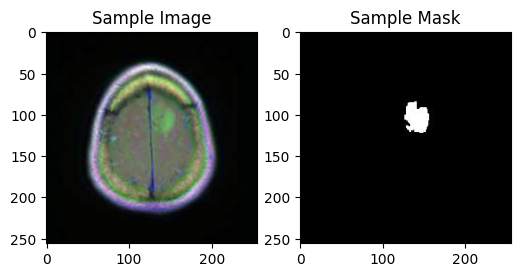

In [4]:
import matplotlib.pyplot as plt
import torch

# Display a sample image from the training dataset
sample_image, sample_mask = train_dataset[0]
print(sample_image.shape)
print(sample_mask.shape)


# Convert the image tensor to a numpy array and transpose for correct channel ordering
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image.permute(1, 2, 0).numpy())
plt.title("Sample Image")

plt.subplot(1, 2, 2)
plt.imshow(sample_mask[0].squeeze().numpy(), cmap='gray')
plt.title("Sample Mask")


plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [8]:
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, outputs, masks):
        smooth = 1e-5
        outputs = torch.sigmoid(outputs)
        intersection = (outputs * masks).sum()
        dice = (2. * intersection + smooth) / (outputs.sum() + masks.sum() + smooth)
        return 1 - dice

class CombinedLoss(nn.Module):
    def __init__(self, weight_dice=0.6, weight_bce=0.4):
        super(CombinedLoss, self).__init__()
        self.dice_loss = DiceLoss()  # Replace DiceLoss with your implementation
        self.bce_loss = nn.BCEWithLogitsLoss()
        self.weight_dice = weight_dice
        self.weight_bce = weight_bce

    def forward(self, pred, target):
        dice_loss_value = self.dice_loss(pred, target)
        bce_loss_value = self.bce_loss(pred, target)
        return self.weight_dice * dice_loss_value + self.weight_bce * bce_loss_value

import torch
import torch.nn as nn

import torch
import torch.nn as nn

class CELDice:
    def __init__(self, dice_weight=0, num_classes=2):
        self.bce_loss = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary segmentation
        self.dice_weight = dice_weight
        self.num_classes = num_classes

    def __call__(self, outputs, targets):
        # BCEWithLogitsLoss combines sigmoid and binary cross-entropy
        loss = (1 - self.dice_weight) * self.bce_loss(outputs, targets)
        
        if self.dice_weight:
            eps = 1e-15
            # For binary segmentation, we only have 2 classes (0 and 1)
            jaccard_target = targets.float()  # targets should be binary (0 or 1)
            jaccard_output = torch.sigmoid(outputs)  # Apply sigmoid to get probability for class 1
            
            intersection = (jaccard_output * jaccard_target).sum()
            union = jaccard_output.sum() + jaccard_target.sum()
            
            # Compute the Dice loss and subtract it from the total loss
            loss -= torch.log((2 * intersection + eps) / (union + eps)) * self.dice_weight

        return loss



In [7]:
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 5 epochs"""
    lr = 1e-4* (0.8 ** (epoch // 5))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [9]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = CombinedLoss()
opt = optim.Adam(model.parameters(), lr=1e-5)

def train_model(model, train_loader, epochs):
    for epoch in range(epochs):
        epoch_loss=0
        for i,(images,labels) in enumerate(train_loader):
            images=images.to(device)
            labels=labels.to(device)
            pred=model.forward(images)
            loss=criterion(pred,labels)
            opt.zero_grad()
            loss.backward()
            opt.step()
            # adjust_learning_rate(opt,epoch)
            epoch_loss+=loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader)}")

In [10]:
train_model(model,train_loader,20)

Epoch 1/20, Loss: 0.7766981771806392
Epoch 2/20, Loss: 0.5056770970302868
Epoch 3/20, Loss: 0.3157618719993568
Epoch 4/20, Loss: 0.2826717514999029
Epoch 5/20, Loss: 0.2647820376768345
Epoch 6/20, Loss: 0.24853454230398667
Epoch 7/20, Loss: 0.19909793364141531
Epoch 8/20, Loss: 0.08613825453127302
Epoch 9/20, Loss: 0.07934734771194739
Epoch 10/20, Loss: 0.074505655768865
Epoch 11/20, Loss: 0.0715145614126894
Epoch 12/20, Loss: 0.06814302497248097
Epoch 13/20, Loss: 0.06437104079508926
Epoch 14/20, Loss: 0.06444415179406845
Epoch 15/20, Loss: 0.059667750795530834
Epoch 16/20, Loss: 0.05841099215307977
Epoch 17/20, Loss: 0.05891690503927023
Epoch 18/20, Loss: 0.05852986656401942
Epoch 19/20, Loss: 0.05623558375272688
Epoch 20/20, Loss: 0.05712237106106145


In [11]:
model.eval()

RAUNet(
  (firstconv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (firstbn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (firstrelu): ReLU(inplace=True)
  (firstmaxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): R

In [34]:
img,mask=train_dataset[10]
out=model(img.unsqueeze(0).to(device))
out = (out > 0.5).to(torch.uint8)


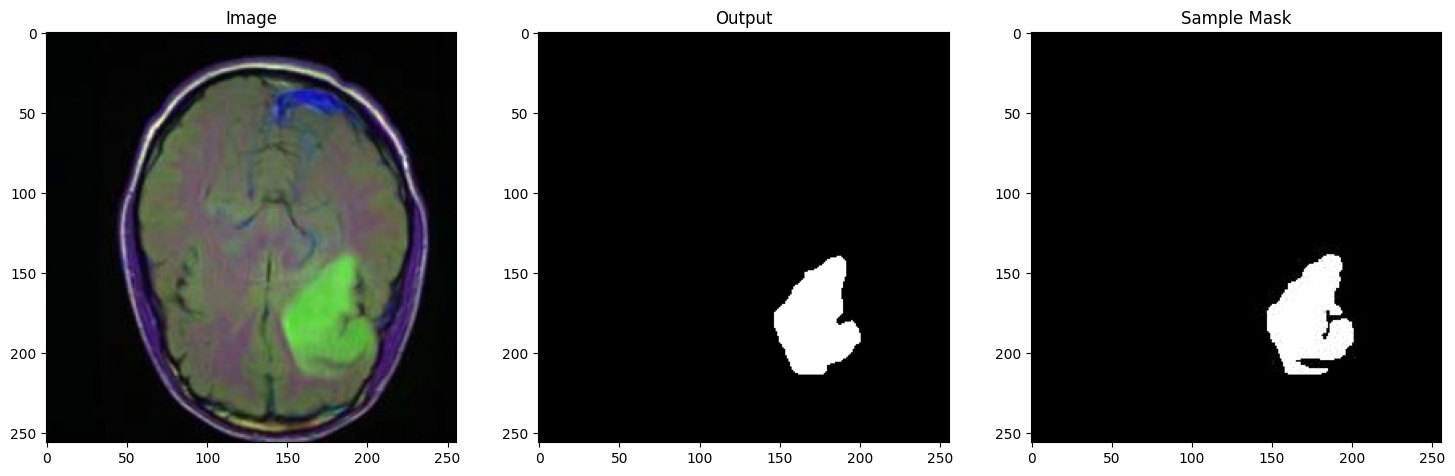

In [35]:
out=out.cpu()
img=img.cpu()
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.title("Image")


plt.subplot(1, 3, 2)
plt.imshow(out.squeeze().detach().numpy(), cmap='gray')
plt.title("Output")

plt.subplot(1, 3, 3)
plt.imshow(mask[0].squeeze().numpy(), cmap='gray')
plt.title("Sample Mask")


plt.show()